In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [90]:
data = pd.read_csv('WMT.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/3/2000,22.791668,23.000000,21.833332,22.270832,14.469358,25109700
1,1/4/2000,21.833332,21.937500,21.395832,21.437500,13.927947,20235300
2,1/5/2000,21.291668,21.458332,20.729168,21.000000,13.643703,21056100
3,1/6/2000,21.000000,21.520832,20.895832,21.229168,13.792585,19633500
4,1/7/2000,21.500000,22.979168,21.500000,22.833332,14.834813,23930700


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6118 entries, 0 to 6117
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6118 non-null   float64
 1   Open       6118 non-null   float64
 2   High       6118 non-null   float64
 3   Low        6118 non-null   float64
 4   Close      6118 non-null   float64
 5   Adj Close  6118 non-null   float64
 6   Volume     6118 non-null   int64  
 7   Year       6118 non-null   int32  
dtypes: float64(6), int32(1), int64(1)
memory usage: 358.6 KB


In [50]:
data.describe()

,Date,Open,High,Low,Close,Adj Close,Volume,Year
count,6118.000000,6118.000000,6118.000000,6118.000000,6118.000000,6118.000000,6.118000e+03,6118.000000
mean,15399.928735,25.835724,26.061299,25.618364,25.840958,21.663140,3.145340e+07,2011.667212
std,2563.341967,11.552502,11.628584,11.482173,11.554953,13.027950,1.977651e+07,7.019793
min,10959.000000,14.000000,14.226667,13.812500,14.090000,9.398979,6.094200e+06,2000.000000
25%,13181.250000,17.486668,17.674166,17.336666,17.500833,11.893549,1.909170e+07,2006.000000
50%,15399.500000,20.193333,20.373333,20.006666,20.225000,15.388837,2.556390e+07,2012.000000
75%,17618.750000,29.551666,29.820834,29.311667,29.589167,26.622051,3.745148e+07,2018.000000
max,19839.000000,61.320000,61.660000,61.049999,61.450001,61.450001,2.903604e+08,2024.000000


In [51]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Year         0
dtype: int64

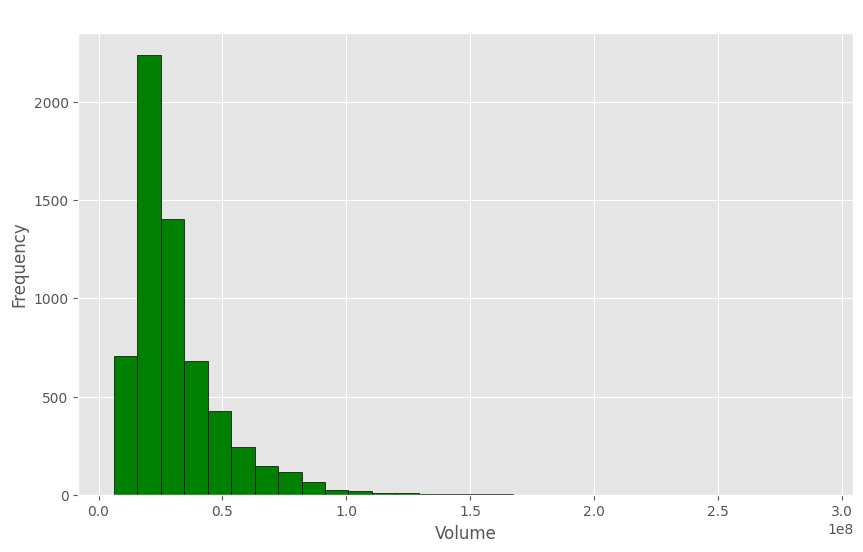

In [83]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 6))
plt.hist(data['Volume'], bins=30, color='green', edgecolor='black', alpha = 1.0)
plt.title('Distribution of Trading Volumes')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


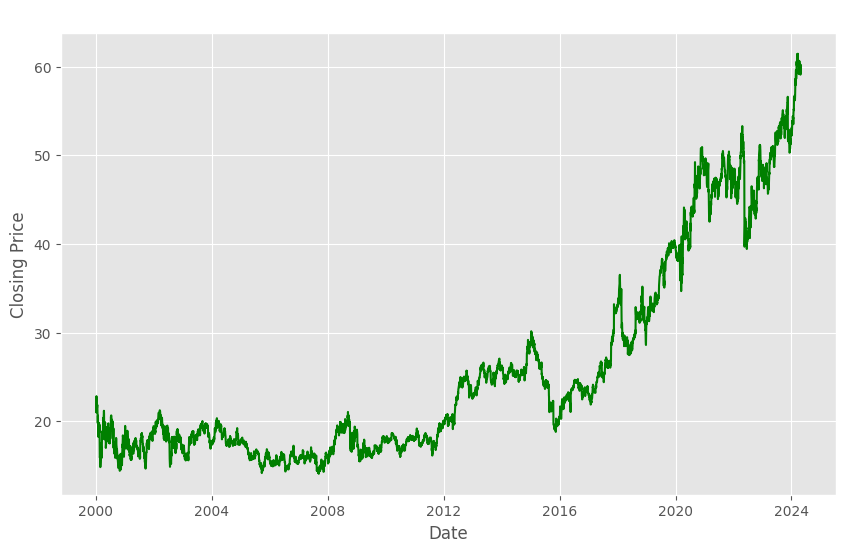

In [84]:
data['Date'] = pd.to_datetime(data['Date'])  
data.set_index('Date', inplace=True)  

plt.style.use('dark_background')
plt.style.use('ggplot')
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Close'], color='green')
plt.title('Walmart Closing Stock Price (2000 - 2024)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()


Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object


<Figure size 1000x600 with 0 Axes>

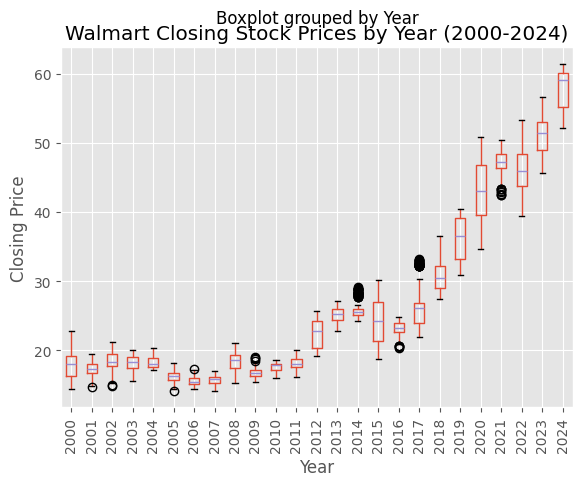

In [87]:
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
print(data.dtypes)

data['Year'] = data['Date'].dt.year
plt.style.use('default')
plt.style.use('ggplot')
plt.figure(figsize=(10, 6))
data.boxplot(column='Close', by='Year')
plt.title('Walmart Closing Stock Prices by Year (2000-2024)')
plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()


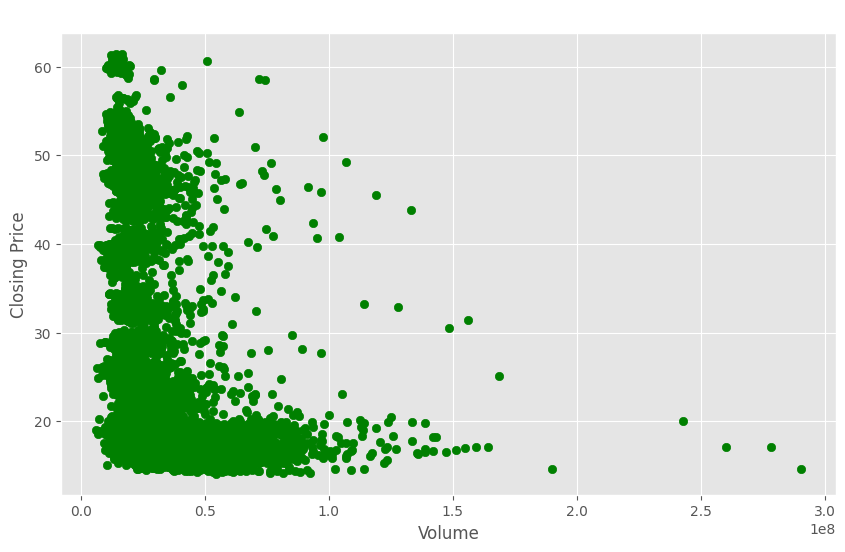

In [75]:
plt.style.use('dark_background')
plt.style.use('ggplot')
plt.figure(figsize=(10, 6))
plt.scatter(data['Volume'], data['Close'], color = 'green', alpha = 1.0)
plt.title('Walmart Closing Stock Prices vs Trading Volume')
plt.xlabel('Volume')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()

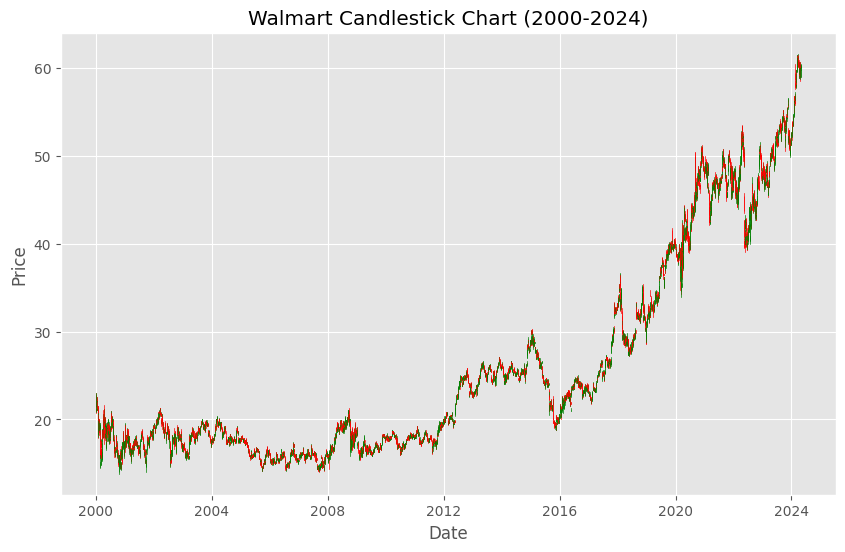

In [88]:
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mdates

data['Date'] = data['Date'].apply(mdates.date2num)
ohlc = data[['Date', 'Open', 'High', 'Low', 'Close']]

plt.style.use('ggplot')
plt.figure(figsize=(10, 6))
ax = plt.subplot()
candlestick_ohlc(ax, ohlc.values, width = 0.6, colorup = 'g', colordown = 'r')
ax.xaxis_date()
plt.title('Walmart Candlestick Chart (2000-2024)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

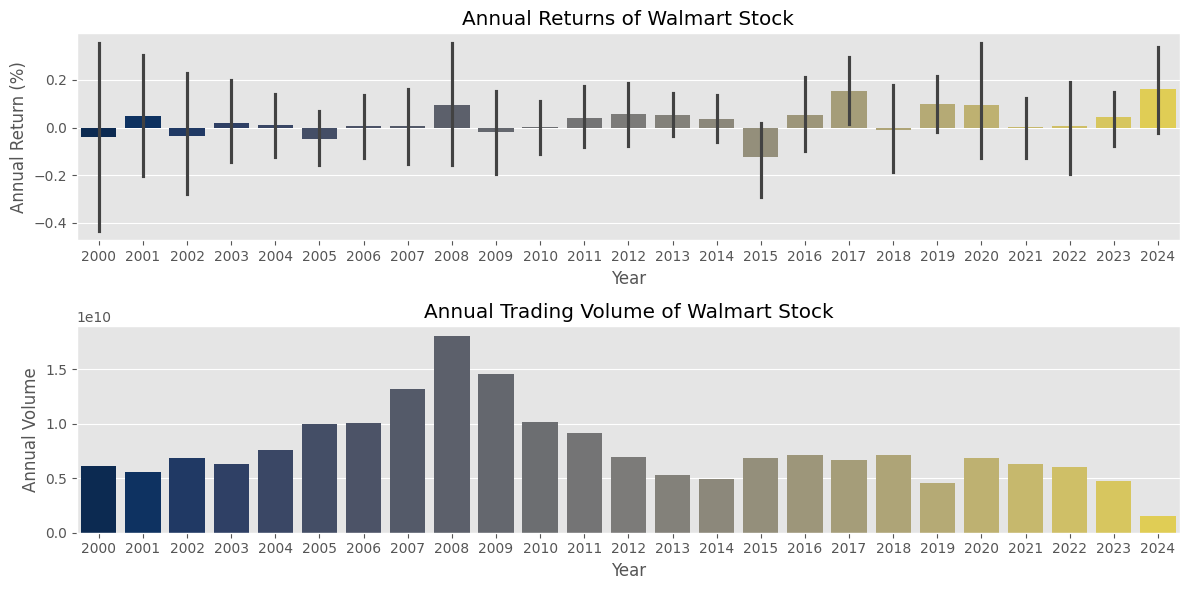

In [91]:
data['Year'] = pd.to_datetime(data['Date']).dt.year

data['Annual_Return'] = data.groupby('Year')['Close'].pct_change() * 100
data['Annual_Volume'] = data.groupby('Year')['Volume'].transform('sum')


plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
sns.barplot(data=data, x='Year', y='Annual_Return', palette='cividis')
plt.title('Annual Returns of Walmart Stock')
plt.xlabel('Year')
plt.ylabel('Annual Return (%)')

plt.subplot(2, 1, 2)
sns.barplot(data=data, x='Year', y='Annual_Volume', palette='cividis')
plt.title('Annual Trading Volume of Walmart Stock')
plt.xlabel('Year')
plt.ylabel('Annual Volume')
plt.tight_layout()
plt.show()